In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
df1=pd.read_csv("/home/siddhartha/Documents/ML_problem_statements/MobilePricesClassification/train.csv")

In [142]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier # A combine model of many decision trees
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [143]:
X = df1[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi','price_range']]
Y = df1['price_range']

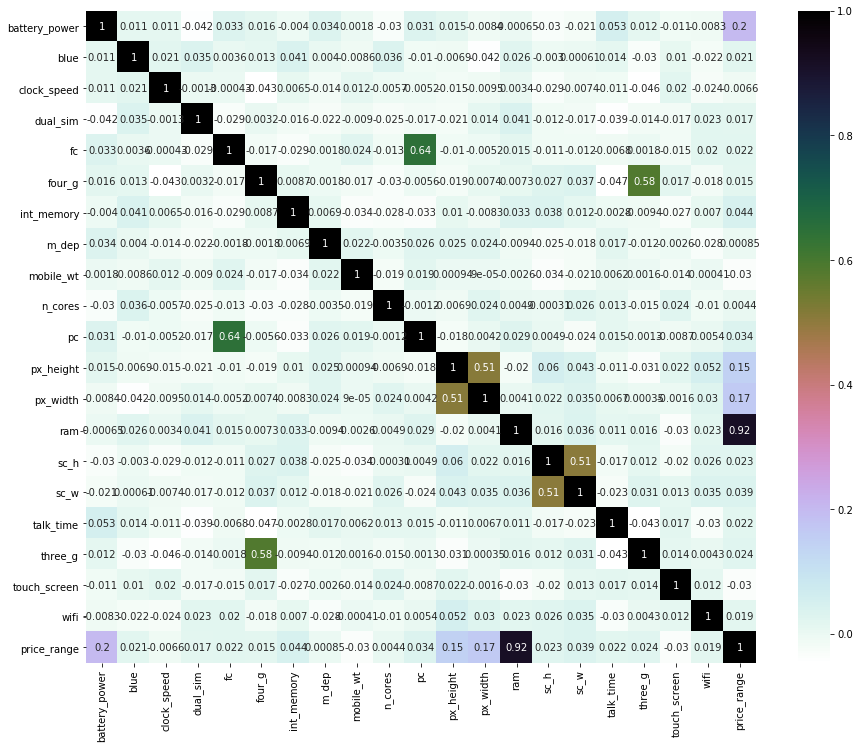

In [144]:
plt.figure(figsize=(15,12)) 
sns.heatmap(X.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [145]:
train, test = train_test_split(df1, test_size = 0.3, random_state=1212)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(1400, 21)
(600, 21)


In [146]:
train_X = train[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','touch_screen','wifi']]# taking the training data features
#train_X = train[['battery_power','blue','clock_speed','dual_sim','int_memory','m_dep','n_cores','pc','px_width','ram','sc_h','sc_w','talk_time','three_g','wifi']]# taking the training data features
train_y = train.price_range# output of our training data
test_X = test[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','touch_screen','wifi']]
test_y = test.price_range   #output value of test data

In [147]:
scaler = StandardScaler()
# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_X = scaler.transform(train_X)  
# apply same transformation to test data
test_X = scaler.transform(test_X)

In [148]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.796666666667


In [149]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.806666666667


In [150]:
model = GradientBoostingClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Gradient Boosting Classifier is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Gradient Boosting Classifier is 0.891666666667


In [151]:
clf = MLPClassifier(hidden_layer_sizes=(10,),max_iter=1000,random_state=1)
clf.fit(train_X,train_y)
prediction = clf.predict(test_X)
print('The accuracy of the MLPC is',metrics.accuracy_score(test_y,prediction))

The accuracy of the MLPC is 0.96
